<h2><center> Telecom customer churn analysis </center></h2>

<h3 style="background-color: #93c7f5 ;padding: 15px ; margin: 7px;" align="justify">Overview</h3>

 <p> In this notebook, we will analyze a telecom customer churn dataset. First, we will conduct an exploratory data analysis (EDA) and then we will provide insights based on the analysis.</p>


<h3 style="background-color: #93c7f5 ;padding: 15px ; margin: 7px;" align="justify">About the Data</h3>

 <p> We will use the Telecom customer churn database provided. Each row represents a customer, and each column contains customer attributes described in the metadata.<p>
<p>The dataset includes the following information:<p>
<p>•	Churn_Status: Indicates if a customer left or not.<p>
<p>•	Services: Services signed up for by each customer, such as multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV.<p>
<p>•	Demographics: Contains information about customer gender, age range, and whether they are married and dependents.
</p>


<h3 style="background-color: #93c7f5 ;padding: 15px ; margin: 7px;" align="justify">Notebook Setup</h3>

 <p>First thing to do is to import the set of libraries we are going to use in order to analyse and model our data.</p>


In [4]:
pip install sqlalchemy pyodbc pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load data 

In [6]:
# Database connection details
server = 'teleco-server.database.windows.net'
database = 'A2MTelecoChurn'
username = 'rakidodataproject'
password = 'eReRvHTdk9NxeHg'

# Create connection string
conn_str = f"mssql+pyodbc://{username}:{password}@{server}/{database}?driver=ODBC+Driver+17+for+SQL+Server"
engine = create_engine(conn_str)

# Query your cleaned data
query = "SELECT * FROM Combined_Teleco_Data"
data = pd.read_sql(query, engine)


### Data wrangling

In [7]:
data.head()

,Customer_ID,Gender,Age,Under_30,Senior_Citizen,Married,Dependents,Number_of_Dependents,Multiple_Lines,Internet_Service,...,Satisfaction_Score,Customer_Status,Churn_Label,Churn_Value,Churn_Score,CLTV,Churn_Category,Churn_Reason,Has_Premium_Services,Total_Services
0,0002-ORFBO,female,37,No,No,yes,No,0,no,yes,...,3,stayed,no,0,65,2205,Unknown,Unknown,False,3
1,0003-MKNFE,male,46,No,No,no,No,0,yes,yes,...,5,stayed,no,0,66,5414,Unknown,Unknown,False,1
2,0004-TLHLJ,male,50,No,No,no,No,0,no,yes,...,1,churned,yes,1,71,4479,Competitor,Competitor had better devices,False,1
3,0011-IGKFF,male,78,No,Yes,yes,No,0,no,yes,...,1,churned,yes,1,91,3714,Dissatisfaction,Product dissatisfaction,False,3
4,0013-EXCHZ,female,75,No,Yes,yes,No,0,no,yes,...,1,churned,yes,1,68,3464,Dissatisfaction,Network reliability,False,2


In [8]:
data.info()
print("data shape is :",data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Customer_ID              7043 non-null   object
 1   Gender                   7043 non-null   object
 2   Age                      7043 non-null   int64 
 3   Under_30                 7043 non-null   object
 4   Senior_Citizen           7043 non-null   object
 5   Married                  7043 non-null   object
 6   Dependents               7043 non-null   object
 7   Number_of_Dependents     7043 non-null   int64 
 8   Multiple_Lines           7043 non-null   object
 9   Internet_Service         7043 non-null   object
 10  Internet_Type            7043 non-null   object
 11  Avg_Monthly_GB_Download  7043 non-null   int64 
 12  Online_Security          7043 non-null   object
 13  Online_Backup            7043 non-null   object
 14  Device_Protection_Plan   7043 non-null  

As we can see  our data consist of **7043 rows** and **27 columns** which makes it quite small dataset.
The variables are in an **object** type exept for Age, Number of dependents, Avg monthly GB download, Satisfaction score, Churn value, Churn score, CLTV, Total services are **int64** and Has premium services has a **bool** type.

<h3 style="background-color: #93c7f5 ;padding: 15px ; margin: 7px;" align="justify">Explotory data analysis</h3>

 <p>we will take a look at each variable and check it's distrubution and how it relates with the target.</p>


### Basic summary statistics for numirical variables

In [9]:
data.describe().style.background_gradient()

,Age,Number_of_Dependents,Avg_Monthly_GB_Download,Satisfaction_Score,Churn_Value,Churn_Score,CLTV,Total_Services
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,20.515405,3.244924,0.265370,58.505040,4400.295755,2.071844
std,16.750352,0.962802,20.418940,1.201657,0.441561,21.170031,1183.057152,1.746406
min,19.000000,0.000000,0.000000,1.000000,0.000000,5.000000,2003.000000,0.000000
25%,32.000000,0.000000,3.000000,3.000000,0.000000,40.000000,3469.000000,0.000000
50%,46.000000,0.000000,17.000000,3.000000,0.000000,61.000000,4527.000000,2.000000
75%,60.000000,0.000000,27.000000,4.000000,1.000000,75.500000,5380.500000,3.000000
max,80.000000,9.000000,85.000000,5.000000,1.000000,96.000000,6500.000000,6.000000


### Correlation

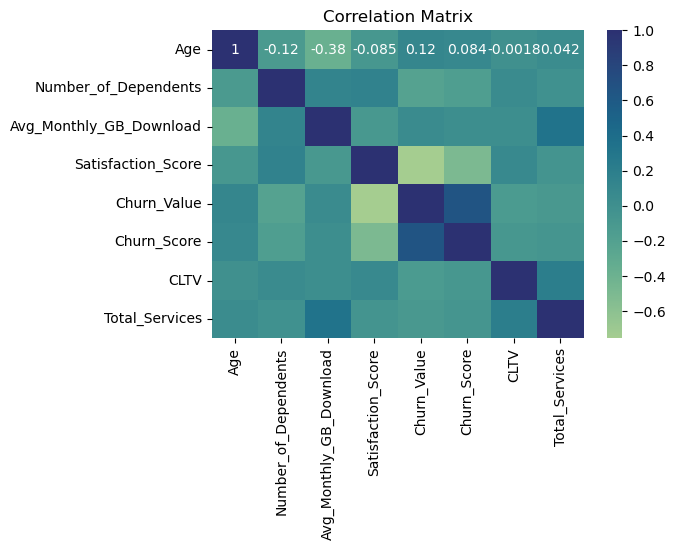

In [13]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Visualize correlation matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='crest')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals that the **Number of Dependents** has a *moderate negative correlation* with churn, meaning customers with more dependents are less likely to leave. **Satisfaction Score** also *negatively correlates* with churn, indicating that higher satisfaction reduces churn likelihood. However, most other variables, like **Age, CLTV, and Total Services**, show *weak correlations*, suggesting that no single feature strongly predicts churn on its own, and a more comprehensive model is needed for accurate churn prediction.

### Target Distribution 

Text(0.5, 1.0, 'Target Distribution ')

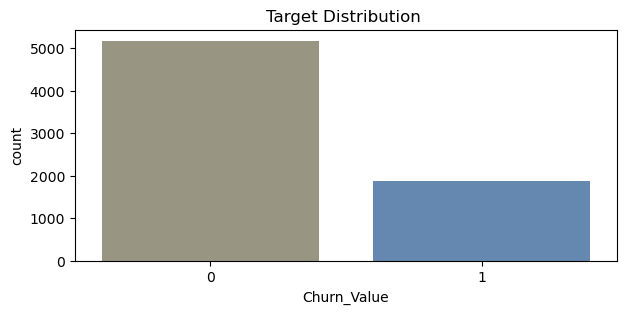

In [15]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x="Churn_Value", palette=['#9b977f', '#5887bb'],)
plt.title('Target Distribution ')

### Churn Distribution By Gender

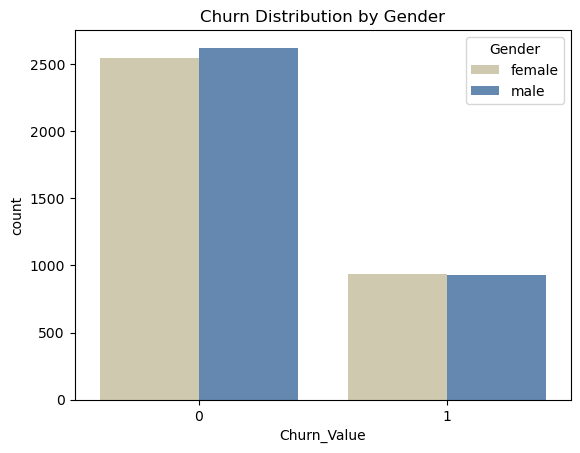

In [16]:
# Count plot for churn by gender
sns.countplot(x='Churn_Value', hue='Gender', data=data, palette=['#d3ccaa', '#5887bb'])
plt.title('Churn Distribution by Gender')
plt.show()


The **Gender** variable is balanced in our dataset (there are exactly 3555 male and 3488 female ) , looking at the figure above we can see that churn is *equally present* with in female as in males.

### Churn By Age Group

C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


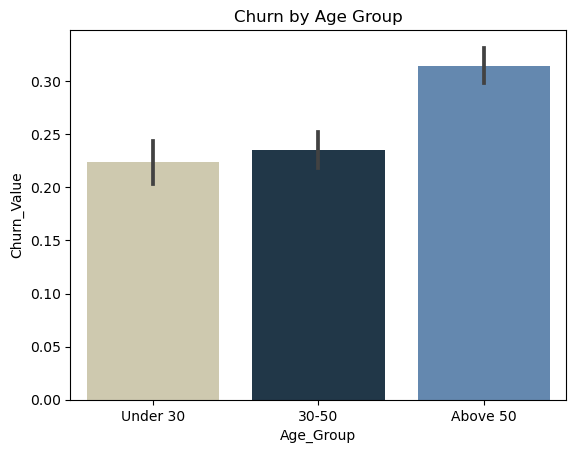

In [17]:
# Create age groups
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Under 30', '30-50', 'Above 50'])

# Bar plot for churn by age group
sns.barplot(x='Age_Group', y='Churn_Value', data=data, palette=['#d3ccaa', '#1b384e', '#5887bb'])
plt.title('Churn by Age Group')
plt.show()

Customers **above 50** have the *highest churn*, while those **under 30** churn the least. Older customers may need targeted retention efforts.

### Churn By Number of Services

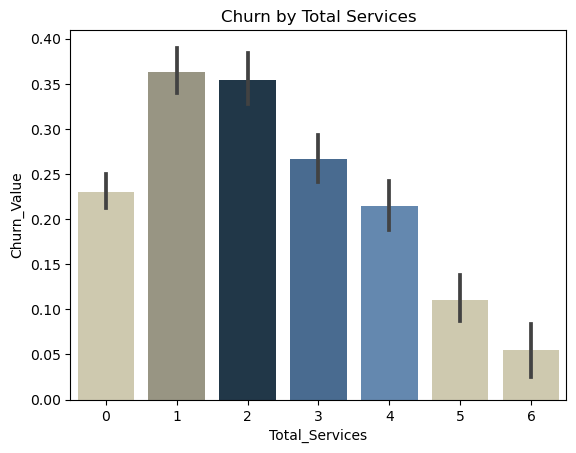

In [20]:
# Bar plot for churn based on the number of services
sns.barplot(x='Total_Services', y='Churn_Value', data=data, palette=['#d3ccaa', '#9b977f', '#1b384e', '#3d6a9c', '#5887bb','#d3ccaa'])
plt.title('Churn by Total Services')
plt.show()

Churn is higher for customers with **1-2 services** and decreases as the number of services increases, suggesting that offering multiple services can reduce churn.

### Churn By Dependents

C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Dependents feature')

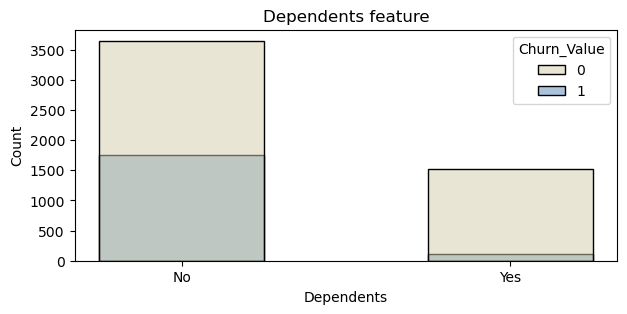

In [22]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x="Dependents",hue='Churn_Value', palette=['#d3ccaa', '#5887bb'],shrink=.5)
plt.title('Dependents feature')

Customers **without dependents** are more common and might churn slightly more, but further analysis is needed to confirm.

###  Telecom services


C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HUAWEI\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Axes: xlabel='Online_Security', ylabel='Count'>

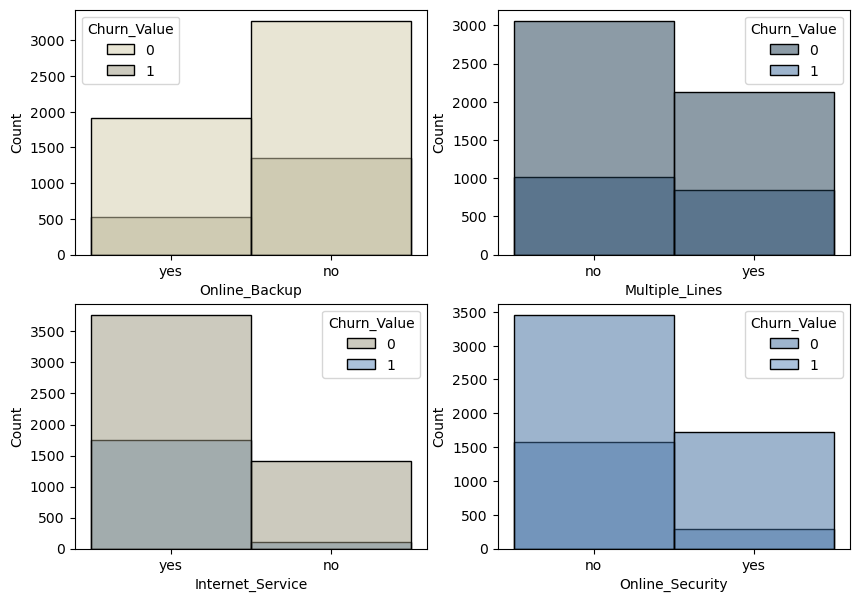

In [24]:
fig, ax = plt.subplots(2, 2,figsize=(10,7))
sns.histplot(data=data,x="Online_Backup",hue='Churn_Value', palette=['#d3ccaa', '#9b977f'],ax=ax[0,0])
sns.histplot(data=data,x="Multiple_Lines",hue='Churn_Value', palette=['#1b384e', '#3d6a9c'],ax=ax[0,1])
sns.histplot(data=data,x="Internet_Service",hue='Churn_Value', palette=['#9b977f', '#5887bb'],ax=ax[1,0])
sns.histplot(data=data,x='Online_Security',hue='Churn_Value', palette=['#3d6a9c', '#5887bb'],ax=ax[1,1])

We can see that services that each customer has signed up for like **phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV**, the figures below shows the distribution of each service and how it affects churn (we can't make conclusion here since we are just exploring the dataset).

<h3 style="background-color: #93c7f5 ;padding: 15px ; margin: 7px;" align="justify">Feature Engineering</h3>

 <p>Engineer new features that could improve the model's prediction accuracy.</p>


In [25]:
# Interaction feature: Senior Citizen with Multiple Services
data['Senior_Citizen_Multi_Services'] = (data['Senior_Citizen'] == 'Yes') & (data['Total_Services'] > 2)

In [26]:
# Log transform Avg_Monthly_GB_Download
data['Log_Monthly_GB_Download'] = np.log1p(data['Avg_Monthly_GB_Download'])

In [27]:
# Combine satisfaction score and churn score to engineer a new feature.
data['Satisfaction_Churn_Score'] = data['Satisfaction_Score'] * data['Churn_Score']